In [3]:
# import libraries:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
# Load the data:
df = pd.read_csv('heightweight.csv')
df

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5
...,...,...,...,...,...
232,m,13.66667,164,66.5,112.0
233,m,15.75000,189,65.0,114.0
234,m,13.66667,164,61.5,140.0
235,m,13.91667,167,62.0,107.5


In [5]:
# setting the column names:
x = df[['HeightIn', 'WeightLB']]
x

,HeightIn,WeightLB
0,56.3,85.0
1,62.3,105.0
2,63.3,108.0
3,59.0,92.0
4,62.5,112.5
...,...,...
232,66.5,112.0
233,65.0,114.0
234,61.5,140.0
235,62.0,107.5


In [6]:
## data prep: scale the data
scaler = MinMaxScaler()
x_scaled= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,HeightIn,WeightLB
0,0.269767,0.285124
1,0.548837,0.450413
2,0.595349,0.475207
3,0.395349,0.342975
4,0.558140,0.512397
...,...,...
232,0.744186,0.508264
233,0.674419,0.524793
234,0.511628,0.739669
235,0.534884,0.471074


# model eval

In [7]:
# evaluating the model by kmeans:
model_v2 = KMeans(n_clusters=3)
model_v2.fit_transform(x_scaled)
model_v2.labels_


array([2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2], dtype=int32)

In [8]:
# building the first model with scaling:
km = KMeans(n_clusters=5, n_init=20)
km.fit(x_scaled)

KMeans(n_clusters=5, n_init=20)

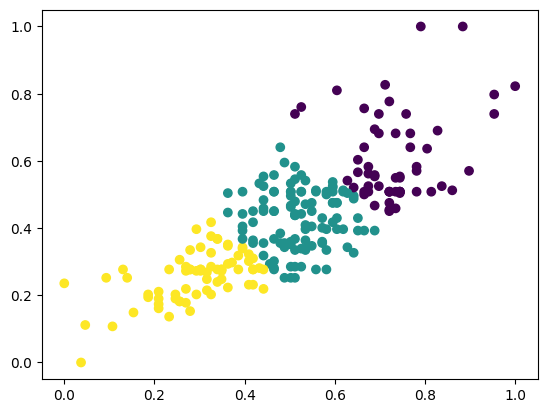

In [9]:
# plotting the data:
plt.scatter(x_scaled.HeightIn, x_scaled.WeightLB, c = model_v2.labels_)

In [10]:
sse = [] # elbow method
s_score = [] # 
c_score = [] #

for k in range(2,11):
    km = KMeans(n_clusters=k, n_init=20) # the # of times that k-means alg w diff centroid seeds
    km.fit(x_scaled) # use x here in order to determine the number of clusters to do
    sse.append(km.inertia_)
    score = silhouette_score(x_scaled, km.labels_)
    s_score.append(score)
    cscore = calinski_harabasz_score(x_scaled, km.labels_)
    c_score.append(cscore)

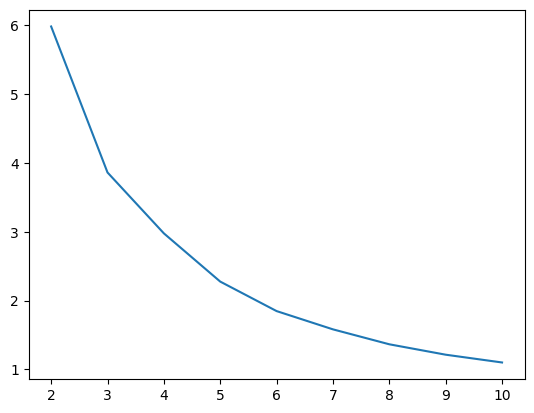

In [11]:
# plotting sse:
plt.plot(range(2,11), sse)

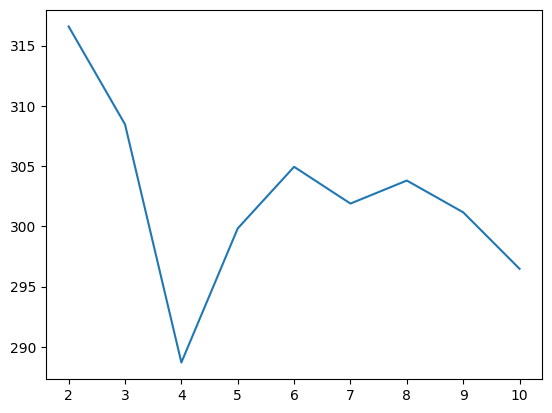

In [12]:
# plotting silhouette score:
plt.plot(range(2,11), c_score)

In [ ]:
km = KMeans(n_clusters=5, n_init=20)
km.fit(x_scaled)
km.labels_

In [15]:
x_scaled.head(2)

,HeightIn,WeightLB
0,0.269767,0.285124
1,0.548837,0.450413


In [16]:
# predicting the cluster of a new point:
km.predict([[0.451064, 0.233333]])

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [17]:
# adding the cluster to the data:
df['Clusters'] = km.labels_
df

,gender,ageYear,ageMonth,HeightIn,WeightLB,Clusters
0,f,11.91667,143,56.3,85.0,2
1,f,12.91667,155,62.3,105.0,3
2,f,12.75000,153,63.3,108.0,3
3,f,13.41667,161,59.0,92.0,1
4,f,15.91667,191,62.5,112.5,3
...,...,...,...,...,...,...
232,m,13.66667,164,66.5,112.0,0
233,m,15.75000,189,65.0,114.0,0
234,m,13.66667,164,61.5,140.0,4
235,m,13.91667,167,62.0,107.5,3


In [18]:
# aggreagting the data with min, max, and standard deviation:
df.groupby('Clusters')[['ageYear','HeightIn', 'WeightLB']].agg({min,max, np.std})
# helps with define boundries for clusters 

ageYear                     HeightIn                 WeightLB  \
               min       std       max      min       std   max      min   
Clusters                                                                   
0         12.41667  1.108028  16.91667     64.0  1.334776  69.8     98.0   
1         11.58333  1.135027  15.83333     56.8  1.498089  63.0     77.0   
2         11.58333  0.754342  15.50000     50.5  1.821676  57.8     50.5   
3         11.58333  1.277884  17.50000     58.3  1.368599  64.5     90.0   
4         12.91667  1.728798  20.83333     61.5  2.943437  72.0    133.0   

                            
                std    max  
Clusters                    
0          6.622325  128.0  
1          6.488438  104.5  
2          7.888092   91.0  
3          8.004923  128.0  
4         11.486743  171.5

# dbscan

In [19]:
x_scaled

,HeightIn,WeightLB
0,0.269767,0.285124
1,0.548837,0.450413
2,0.595349,0.475207
3,0.395349,0.342975
4,0.558140,0.512397
...,...,...
232,0.744186,0.508264
233,0.674419,0.524793
234,0.511628,0.739669
235,0.534884,0.471074


In [20]:
# implementing DBScan:
dbs = DBSCAN(eps=0.17, min_samples=5)
# min_sample to twice the number of ft like here there is four ft so min_samples=5
# eps is harder to choose 

In [21]:
# fitting the model:
dbs.fit(x_scaled)

DBSCAN(eps=0.17)

In [22]:
# getting the labels:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [23]:
# adding the labels to the data:
df['dbscan_cluster'] = dbs.labels_
df

,gender,ageYear,ageMonth,HeightIn,WeightLB,Clusters,dbscan_cluster
0,f,11.91667,143,56.3,85.0,2,0
1,f,12.91667,155,62.3,105.0,3,0
2,f,12.75000,153,63.3,108.0,3,0
3,f,13.41667,161,59.0,92.0,1,0
4,f,15.91667,191,62.5,112.5,3,0
...,...,...,...,...,...,...,...
232,m,13.66667,164,66.5,112.0,0,0
233,m,15.75000,189,65.0,114.0,0,0
234,m,13.66667,164,61.5,140.0,4,0
235,m,13.91667,167,62.0,107.5,3,0


In [24]:
# filtering the dbscan_cluster == -1:
df[df.dbscan_cluster==-1]

,gender,ageYear,ageMonth,HeightIn,WeightLB,Clusters,dbscan_cluster
130,m,20.83333,250,67.5,171.5,4,-1
213,m,17.16667,206,69.5,171.5,4,-1
216,m,16.08333,193,72.0,150.0,4,-1


In [25]:
# locating a specefic row in the data:
x_scaled.loc[130:130,:]

,HeightIn,WeightLB
130,0.790698,1.0


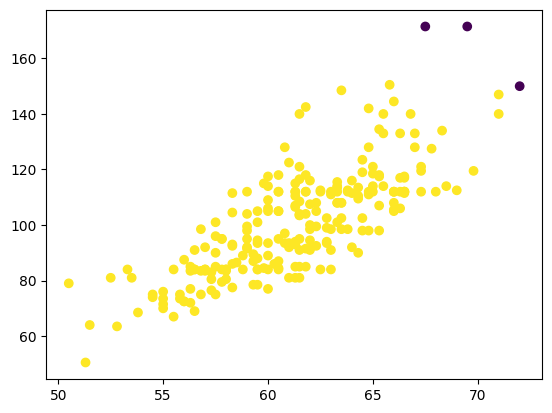

In [26]:
# plotting the clusters:
plt.scatter(df.HeightIn, df.WeightLB, c=dbs.labels_)

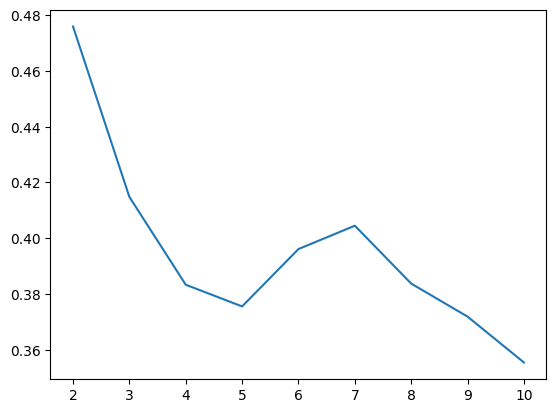

In [27]:
# plotting the silhouette score after DBScan:
plt.plot(range(2,11), s_score)